# Pre-processing & Classification Try-Outs

## Datasets

- ~~Full~~
- ~~Cleaned~~
- ~~Cleaned+MinMaxScaled~~
- ~~Cleaned+RobustScaled~~
- ~~Cleaned+QuantileTransformed~~
- Cleaned+Extended+MinMaxScaled
- Cleaned+CleanExtended+MinMaxScaled

## Classifiers

- ~~RandomForest~~
- SVM/C
- kNN
- ~~SGD~~

## Winner

SVM/C `kernel='rbf', C=3.0, gamma=0.2` with Cleaned+CleanExtended+MinMaxScaled

In [1]:
# IMPORTS AND NOTEBOOK SETUP
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

\# | Rank | Classifier | Options | Dataset | Score
--- | --- | --- | --- | ---| ---
1 |1 |SVM/C | `kernel='rbf', C=1.5, gamma=0.2` | Cleaned+Extended+MinMaxScaled | `0.98541666666666672`
2 |1 |SVM/C | `kernel='rbf', C=8.7, gamma=0.04` | Cleaned+Extended+MinMaxScaled | `0.98333333333333328`
3 |1 |kNN | `n_neigbors=3` | Cleaned+Extended+MinMaxScaled | `0.98333333333333328`
4 |1 |SVM/C | `kernel='rbf', C=3.0, gamma=0.2` | Cleaned+CleanExtended+MinMaxScaled | `0.97916666666666663`

Default options:

- Scikit Learn train/test split ratio: `.25`.
- Normalizing all columns but `num_holes`.

## outdated

\# | Rank | Classifier | Options | Dataset | Score
--- | --- | --- | --- | ---| ---
1 |1 |SVM/C | `kernel='rbf', C=6.6, gamma=0.35` | Cleaned+MinMaxScaled | `0.978873239436`
1 |1 |SVM/C | `kernel='rbf', C=3.9, gamma=0.59` | Cleaned+MinMaxScaled | `0.978873239436`
1 |1 |SVM/C | `C=2.0` | Cleaned+MinMaxScaled | `0.973958333333`
2 |1 |SVM/C | `C=4.9` | Cleaned+RobustScaled | `0.973958333333`
3 |3 |SVM/C | `kernel='rbf', C=3.9` | Cleaned+MinMaxScaled | `0.967391304347`
4 |3 |SVM/C | `kernel='sigmoid', C=9.6` | Cleaned+MinMaxScaled | `0.967391304347`
5 |5 |RandomForest | `n_estimators=70` | Cleaned | `0.953125000000`
6 |5 |RandomForest | `n_estimators=70` | Cleaned+MinMaxScaled | `0.953125000000`
7 |5 |SVM/C | `C=2.6` | Cleaned+QuantileTransformed | `0.953125000000`
8 |8 |SVM/C | `C=4.3` | Cleaned | `0.947916666667`
9 |8 |RandomForest | `n_estimators=16` | Cleaned+RobustScaled | `0.947916666667`
10|8 |RandomForest | `n_estimators=32` | Cleaned+QuantileTransformed | `0.947916666667`
11|11|RandomForest | `n_estimators=90` | Full | `0.942708333333`
12|12|SVM/C | `default` | Full | `0.932291666667`

Default options:

- RandomForest with `n_estimators=50`, `oob_score=True` and `random_state=123456`.
- SVM/C with `kernel=linear`, `C=1.0`.

Normalizing all columns but `num_holes`.

In [3]:
# IMPORTING OUR DATASET
data_full = pd.read_csv('../dataset-numpy/dataset.csv')
data_clean_manual = pd.read_csv('../dataset-numpy/dataset-clean-manual.csv')
data_ext_clean_manual = pd.read_csv('../dataset-numpy/dataset-extended-clean-manual.csv')
data_v4 = pd.read_csv('../dataset-numpy/dataset-v4.csv')
data_v6 = pd.read_csv('../dataset-numpy/dataset-v6.csv')

data_ext_clean_manual.columns

Index([u'area', u'contours', u'radius', u'hull_radius', u'centroid_x',
       u'centroid_y', u'weight_0_0', u'weight_0_1', u'weight_0_2',
       u'weight_0_3', u'weight_0_4', u'weight_0_5', u'weight_0_6',
       u'weight_0_7', u'weight_1_0', u'weight_1_1', u'weight_1_2',
       u'weight_1_3', u'weight_1_4', u'weight_1_5', u'weight_1_6',
       u'weight_1_7', u'weight_2_0', u'weight_2_1', u'weight_2_2',
       u'weight_2_3', u'weight_2_4', u'weight_2_5', u'weight_2_6',
       u'weight_2_7', u'weight_3_0', u'weight_3_1', u'weight_3_2',
       u'weight_3_3', u'weight_3_4', u'weight_3_5', u'weight_3_6',
       u'weight_3_7', u'weight_4_0', u'weight_4_1', u'weight_4_2',
       u'weight_4_3', u'weight_4_4', u'weight_4_5', u'weight_4_6',
       u'weight_4_7', u'weight_5_0', u'weight_5_1', u'weight_5_2',
       u'weight_5_3', u'weight_5_4', u'weight_5_5', u'weight_5_6',
       u'weight_5_7', u'weight_6_0', u'weight_6_1', u'weight_6_2',
       u'weight_6_3', u'weight_6_4', u'weight_6_5', u'weig

## Normalization

In [3]:
less_columns = data_clean_manual.columns.values
columns_v4 = data_v4.columns.values
columns_v6 = data_v6.columns.values
columns_to_not_normalize = ['num_holes', 'label']

columns_v4_to_normalize = [c for c in columns_v4 if not c in columns_to_not_normalize]
columns_v6_to_normalize = [c for c in columns_v6 if not c in columns_to_not_normalize]
less_columns_to_normalize = [c for c in less_columns if not c in columns_to_not_normalize]
        
def scale(data, scaler, columns):
    return pd.DataFrame(scaler.fit_transform(data[columns]), columns=columns)

### MinMaxScaler

In [4]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaled = data_clean_manual.copy()
minmaxscaled[less_columns_to_normalize] = scale(data_clean_manual, MinMaxScaler(), less_columns_to_normalize)

minmaxscaled_ext = data_ext_clean_manual.copy()
minmaxscaled_ext[columns_v4_to_normalize] = scale(data_ext_clean_manual, MinMaxScaler(), columns_v4_to_normalize)

scaled_v4 = data_v4.copy()
scaled_v4[columns_v4_to_normalize] = scale(data_v4, MinMaxScaler(), columns_v4_to_normalize)

scaled_v6 = data_v6.copy()
scaled_v6[columns_v6_to_normalize] = scale(data_v6, MinMaxScaler(), columns_v6_to_normalize)

print minmaxscaled.shape, minmaxscaled_ext.shape, scaled_v4.shape, scaled_v6.shape
scaled_v6.describe()

(1920, 24) (1920, 72) (1920, 60) (1920, 56)


,area,contours,radius,hull_radius,centroid_x,centroid_y,angle,weight_0_2,weight_0_3,weight_0_4,...,weight_6_5,weight_6_6,weight_7_2,weight_7_3,weight_7_4,weight_7_5,weight_7_6,weight_7_7,num_holes,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,0.386221,0.366942,0.454885,0.431804,0.469217,0.467661,0.779948,0.393815,0.817187,0.787565,...,0.591960,0.240299,0.412956,0.813086,0.781217,0.472656,0.151497,0.018034,0.379688,4.532813
std,0.187824,0.128599,0.184747,0.166394,0.139196,0.182193,0.368169,0.333569,0.281508,0.296906,...,0.375565,0.315142,0.342576,0.284703,0.331414,0.403487,0.284578,0.096219,0.584767,2.868122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253482,0.279412,0.315569,0.310002,0.378048,0.344453,0.863493,0.062500,0.750000,0.625000,...,0.250000,0.000000,0.062500,0.750000,0.625000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.341226,0.352941,0.429087,0.422310,0.462067,0.459344,0.973220,0.375000,1.000000,1.000000,...,0.750000,0.062500,0.375000,1.000000,1.000000,0.437500,0.000000,0.000000,0.000000,5.000000
75%,0.481894,0.455882,0.569182,0.539510,0.552328,0.562653,1.000000,0.687500,1.000000,1.000000,...,0.937500,0.437500,0.703125,1.000000,1.000000,0.875000,0.125000,0.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,9.000000


### ~~RobustScaler~~

In [ ]:
from sklearn.preprocessing import RobustScaler

robustscaled = data_clean_manual.copy()
robustscaled[columns] = scale(data_clean_manual, RobustScaler(), columns)
robustscaled.describe()

### ~~QuantileTransformer~~

In [ ]:
from sklearn.preprocessing import QuantileTransformer

quantiletransformed = data_clean_manual.copy()
quantiletransformed[columns] = scale(data_clean_manual, QuantileTransformer(), columns)
quantiletransformed.describe()

## Splitting the dataset

In [6]:
from sklearn.model_selection import train_test_split

def split(data, ratio):
    return train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=ratio)

X_train, X_test, Y_train, Y_test = split(scaled_v6, .25)

## Try Random Forest Classifier

In [7]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

top_rf = (2, 0.0)
for n_e in range(2, 101):
    rf = RandomForestClassifier(n_estimators=n_e, oob_score=True, random_state=123456)
    rf.fit(X_train, Y_train)
    score = rf.score(X_test, Y_test)
    if score > top_rf[1]:
        top_rf = (n_e, score)
        print('N_E:', n_e, 'Score:', score)
print('Top:', top_rf)

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


('N_E:', 2, 'Score:', 0.8041666666666667)
('N_E:', 3, 'Score:', 0.88541666666666663)
('N_E:', 4, 'Score:', 0.91249999999999998)
('N_E:', 6, 'Score:', 0.94166666666666665)
('N_E:', 7, 'Score:', 0.94374999999999998)
('N_E:', 8, 'Score:', 0.9458333333333333)
('N_E:', 9, 'Score:', 0.94999999999999996)
('N_E:', 11, 'Score:', 0.95625000000000004)
('N_E:', 14, 'Score:', 0.95833333333333337)
('N_E:', 15, 'Score:', 0.9604166666666667)
('N_E:', 16, 'Score:', 0.96458333333333335)
('N_E:', 17, 'Score:', 0.96875)
('N_E:', 22, 'Score:', 0.97083333333333333)
('N_E:', 24, 'Score:', 0.97291666666666665)
('N_E:', 46, 'Score:', 0.97499999999999998)
('N_E:', 62, 'Score:', 0.9770833333333333)
('N_E:', 81, 'Score:', 0.97916666666666663)
('Top:', (81, 0.97916666666666663))


## Try Support Vector Machine

100 x random train test split:

\# | Dataset | Options | Min | Max | Mean | Variance
---| --- | --- | --- | --- | --- | ---
1 | Cleaned+Extended+MinMaxScaled | `kernel='rbf', C=1.5, gamma=0.2` | `0.9708333333` | `0.9937500000` | `0.9837291666` | `0.022916667`
2 | ~~Cleaned+CleanExtended+MinMaxScaled~~ | `kernel='rbf', C=3.0, gamma=0.2` | `0.9687500000` | `0.9958333333` | `0.9814791666` | `0.027083333`
3 | Cleaned+Extended+MinMaxScaled | `kernel='linear', C=1.1` | `0.9604166666` | `0.9916666666` | `0.9743750000`
4 | Cleaned+MinMaxScaled | `kernel='rbf', C=6.6, gamma=0.35` | `0.9500000000` | `0.9833333333` | `0.9712708333`
5 | ~~Cleaned+CleanExtended+MinMaxScaled~~ | `kernel='linear', C=0.4` | `0.9437500000` | `0.9875000000` | `0.9702708333`
6 | Cleaned+MinMaxScaled | `kernel='linear', C=1.5` | `0.9395833333` | `0.9812500000` | `0.9626250000`

In [32]:
# SVM
from sklearn import svm

ITERS = 100
scores = np.zeros((ITERS))
for i in range(ITERS):
    print i, '/', ITERS - 1
    X_train, X_test, Y_train, Y_test = split(scaled_v6, .25)
    svc = svm.SVC(kernel='rbf', C=3.0, gamma=0.2)
    svc.fit(X_train, Y_train)
    scores[i] = svc.score(X_test, Y_test)
    
print 'Min Score:', scores.min()
print 'Max Score:', scores.max()
print 'Mean Score:', scores.mean()

0 / 99
1 / 99
2 / 99
3 / 99
4 / 99
5 / 99
6 / 99
7 / 99
8 / 99
9 / 99
10 / 99
11 / 99
12 / 99
13 / 99
14 / 99
15 / 99
16 / 99
17 / 99
18 / 99
19 / 99
20 / 99
21 / 99
22 / 99
23 / 99
24 / 99
25 / 99
26 / 99
27 / 99
28 / 99
29 / 99
30 / 99
31 / 99
32 / 99
33 / 99
34 / 99
35 / 99
36 / 99
37 / 99
38 / 99
39 / 99
40 / 99
41 / 99
42 / 99
43 / 99
44 / 99
45 / 99
46 / 99
47 / 99
48 / 99
49 / 99
50 / 99
51 / 99
52 / 99
53 / 99
54 / 99
55 / 99
56 / 99
57 / 99
58 / 99
59 / 99
60 / 99
61 / 99
62 / 99
63 / 99
64 / 99
65 / 99
66 / 99
67 / 99
68 / 99
69 / 99
70 / 99
71 / 99
72 / 99
73 / 99
74 / 99
75 / 99
76 / 99
77 / 99
78 / 99
79 / 99
80 / 99
81 / 99
82 / 99
83 / 99
84 / 99
85 / 99
86 / 99
87 / 99
88 / 99
89 / 99
90 / 99
91 / 99
92 / 99
93 / 99
94 / 99
95 / 99
96 / 99
97 / 99
98 / 99
99 / 99
Min Score: 0.972916666667
Max Score: 0.995833333333
Mean Score: 0.983104166667


In [ ]:
print 'Min Score:', scores.min()
print 'Max Score:', scores.max()
print 'Mean Score:', scores.mean()

## Compared Datasets with Same Options

300 Iterations of 25% splits.

Options: `kernel='rbf', C=2.8, gamma=0.1`

Options: `kernel='rbf', C=3.0, gamma=0.2`

\# | Dataset | Min Score | Mean Score | Max Score
---| --- | --- | --- | ---
1| v4 | `0.96458333` | `0.98163194`| `0.99583333`
2| Cleaned+MinMaxScaled+Extended | `0.96041666` | `0.98059722` | `0.99583333`
3| Cleaned+MinMaxScaled | `0.94791666` | `0.96754861` | `0.98541666`

Options: `kernel='rbf', C=1.5, gamma=0.2`

\# | Dataset | Min Score | Mean Score | Max Score
---| --- | --- | --- | ---
1| v4 | `0.96666666` | `0.98113888`| `0.99583333`
2| Cleaned+MinMaxScaled+Extended | `0.96041666` | `0.97952083` | `0.99375000`
3| Cleaned+MinMaxScaled | `0.93750000` | `0.95971527` | `0.98125000`

## Validating on unseen data

In [15]:
DATASET = scaled_v6
X_train_test, X_validation, Y_train_test, Y_validation = split(DATASET, .1)

print X_train_test.shape, X_validation.shape, Y_train_test.shape, Y_validation.shape

(1728, 55) (192, 55) (1728,) (192,)


In [16]:
# Testing on train/test data
svc = svm.SVC(kernel='rbf', C=2.8, gamma=0.1)

FOLDS = 10
for i in range(FOLDS):
    X_train, X_test, Y_train, Y_test = train_test_split(X_train_test, Y_train_test, test_size=.25)
    svc.fit(X_train, Y_train)
    print 'Score ', i, ':', svc.score(X_test, Y_test)

print
# Validating on unseen validation data
print 'Score: ', svc.score(X_validation, Y_validation)

Score  0 : 0.990740740741
Score  1 : 0.979166666667
Score  2 : 0.983796296296
Score  3 : 0.981481481481
Score  4 : 0.979166666667
Score  5 : 0.986111111111
Score  6 : 0.983796296296
Score  7 : 0.979166666667
Score  8 : 0.979166666667
Score  9 : 0.988425925926

Score:  0.994791666667


### Finding the optimal C and Gamma for RBF kernel

In [17]:
X_train, X_test, Y_train, Y_test = split(scaled_v6, .25)

Gs = np.arange(.1, 4, .1)
Cs = np.arange(.1, 10, .1)

steps = len(Gs) * len(Cs)
scores = np.zeros((steps))
index = 0
top = (.1, .01, 0)

for g in Gs:
    for c in Cs:
        print('%d / %d' % (index, steps))
        svc = svm.SVC(kernel='rbf', C=c, gamma=g)
        svc.fit(X_train, Y_train)
        score = svc.score(X_test, Y_test)
        scores[index] = score
        if score > top[2]:
            top = (c, g, score)
        index += 1

print('Top:', top)

0 / 3861
1 / 3861
2 / 3861
3 / 3861
4 / 3861
5 / 3861
6 / 3861
7 / 3861
8 / 3861
9 / 3861
10 / 3861
11 / 3861
12 / 3861
13 / 3861
14 / 3861
15 / 3861
16 / 3861
17 / 3861
18 / 3861
19 / 3861
20 / 3861
21 / 3861
22 / 3861
23 / 3861
24 / 3861
25 / 3861
26 / 3861
27 / 3861
28 / 3861
29 / 3861
30 / 3861
31 / 3861
32 / 3861
33 / 3861
34 / 3861
35 / 3861
36 / 3861
37 / 3861
38 / 3861
39 / 3861
40 / 3861
41 / 3861
42 / 3861
43 / 3861
44 / 3861
45 / 3861
46 / 3861
47 / 3861
48 / 3861
49 / 3861
50 / 3861
51 / 3861
52 / 3861


KeyboardInterrupt: 

## Try SGD

In [18]:
from sklearn import linear_model

sgd = linear_model.SGDClassifier(max_iter=1000)
sgd.fit(X_train, Y_train)
score = sgd.score(X_test, Y_test)
print(score)

0.977083333333


## Try kNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
score = knn.score(X_test, Y_test)
print(score)

0.972916666667


In [20]:
Ns = range(3, 30)
scores = np.zeros((len(Ns)))
index = 0
top = (3, 0)
for n in Ns:
    print('%d / %d (%d)' % (index, len(Ns)-1, n))
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, Y_train)
    score = knn.score(X_test, Y_test)
    scores[index] = score
    if score > top[1]:
        top = (n, score)
    index += 1

print('Top:', top)

0 / 26 (3)
1 / 26 (4)
2 / 26 (5)
3 / 26 (6)
4 / 26 (7)
5 / 26 (8)
6 / 26 (9)
7 / 26 (10)
8 / 26 (11)
9 / 26 (12)
10 / 26 (13)
11 / 26 (14)
12 / 26 (15)
13 / 26 (16)
14 / 26 (17)
15 / 26 (18)
16 / 26 (19)
17 / 26 (20)
18 / 26 (21)
19 / 26 (22)
20 / 26 (23)
21 / 26 (24)
22 / 26 (25)
23 / 26 (26)
24 / 26 (27)
25 / 26 (28)
26 / 26 (29)
('Top:', (3, 0.97291666666666665))


## Combining Automation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

datasets = [
    ('Cleaned+MinMaxScaled', minmaxscaled),
    ('Cleaned+Extended+MinMaxScaled', minmaxscaled_ext)
]

options = {
    'AdaBoost': {
        'base_estimator': [
            svm.SVC(kernel='rbf', C=8.7, gamma=0.04),
            RandomForestClassifier(n_estimators=69)
        ],
        'algorithm': ['SAMME']
    },
    'SVM/C': {
        'kernel': ('linear', 'rbf'),
        'C': np.arange(.1, 12.0, .2),
        'gamma': [.001, .005, .01, .025, .05, .075, .1, .25, .5, 1, 3, 5, 8]
    },
    'RandomForest': {
        'n_estimators': range(10, 70)
    }
}

classifiers = [
#     ('AdaBoost', AdaBoostClassifier),
    ('SVM/C', svm.SVC),
#     ('RandomForest', RandomForestClassifier)
]

def search(classifiers, options, datasets, test_size, random_state):
    results = {
        'rank': [],
        'classifier': [],
        'options': [],
        'dataset': [],
        'score': []
    }

    for dataset in datasets:
        X_train, X_test, Y_train, Y_test = train_test_split(dataset[1].iloc[:,:-1], dataset[1].iloc[:,-1],\
                                                            test_size=test_size, random_state=random_state)
        
        for classifier in classifiers:
            name = classifier[0]
            print 'Testing', dataset[0], 'on', name, '...'

            model = GridSearchCV(classifier[1](), options[name], verbose=1, cv=3)
            model.fit(X_train, Y_train)
            
            print 'Params:', model.best_params_
            print 'MSE:', model.best_score_
            print
            
            results['rank'].append(0)
            results['classifier'].append(name)
            results['options'].append(str(model.best_params_))
            results['dataset'].append(dataset[0])
            results['score'].append(model.best_score_)
            
    return results

results = search(classifiers, options, datasets, .35, 123456)

In [ ]:
results_df = pd.DataFrame(results).sort_values(['score'], ascending=[False])
results_df['rank'] = pd.Series(range(1, len(results_df) + 1), index=results_df.index)
results_df[['rank', 'classifier', 'options', 'dataset', 'score']].to_csv('../classifiers/results_testsize35.csv', sep=',', encoding='utf-8', index=False)

## Confusion Matrix

('Accuracy', 0.97083333333333333)


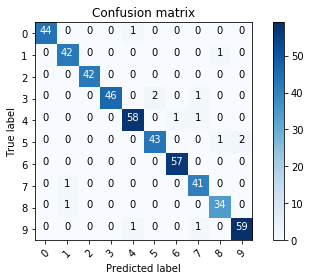

In [30]:
from sklearn.metrics import confusion_matrix
import itertools

best = svm.SVC(kernel='rbf', C=3.0, gamma=0.2)
X_train, X_test, Y_train, Y_test = split(scaled_v6, .25)
Y_pred = best.fit(X_train, Y_train).predict(X_test)

def plot_confusion_matrix(cm, classes):
#     print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()

print('Accuracy', best.score(X_test, Y_test))
plot_confusion_matrix(cnf_matrix, classes=range(0,10))

plt.show()